## Iniciando Extração de Características 

In [83]:
import pandas as pd
import numpy as np
import os

PATH = os.path.abspath('../../')

## Carregando dados

In [84]:
import pickle

with open(PATH + '/data/ecg_generated_seizure.pkl', 'rb') as handle:
    seizure = pickle.load(handle)

with open(PATH + '/data/ecg_normal.pkl', 'rb') as handle:
    normal = pickle.load(handle)


## Funções para Extração

In [114]:
from math import log, e
from joblib import Parallel, delayed

def entropy(labels, base=None):
    n_labels = len(labels)
    
    if n_labels <= 1: return 0
    
    value, counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)
    
    if n_classes <= 1: return 0
        
    ent = 0.
    
    base = e if base is None else base
    
    for i in probs:
        ent -= i * log(i, base)
    return ent


def get_features(signals, func):
    return [func(signal) for signal in signals]

def to_vector(array):
    aux = []
    for row in array:
        for item in row:
            aux.append(item)
    return aux

def pipeline(data,func):
    return to_vector(Parallel(n_jobs=-1)(delayed(get_features)(item['heart_beats'],func) for item in data))


In [115]:
from scipy.stats import skew, kurtosis

seizure_var = pipeline(seizure,np.var)
seizure_ske = pipeline(seizure,skew)
seizure_kur = pipeline(seizure,kurtosis)
seizure_ent = pipeline(seizure,entropy)

normal_var = pipeline(normal,np.var)
normal_ske = pipeline(normal,skew)
normal_kur = pipeline(normal,kurtosis)
normal_ent = pipeline(normal,entropy)



<AxesSubplot:xlabel='label', ylabel='value'>

<Figure size 720x504 with 0 Axes>

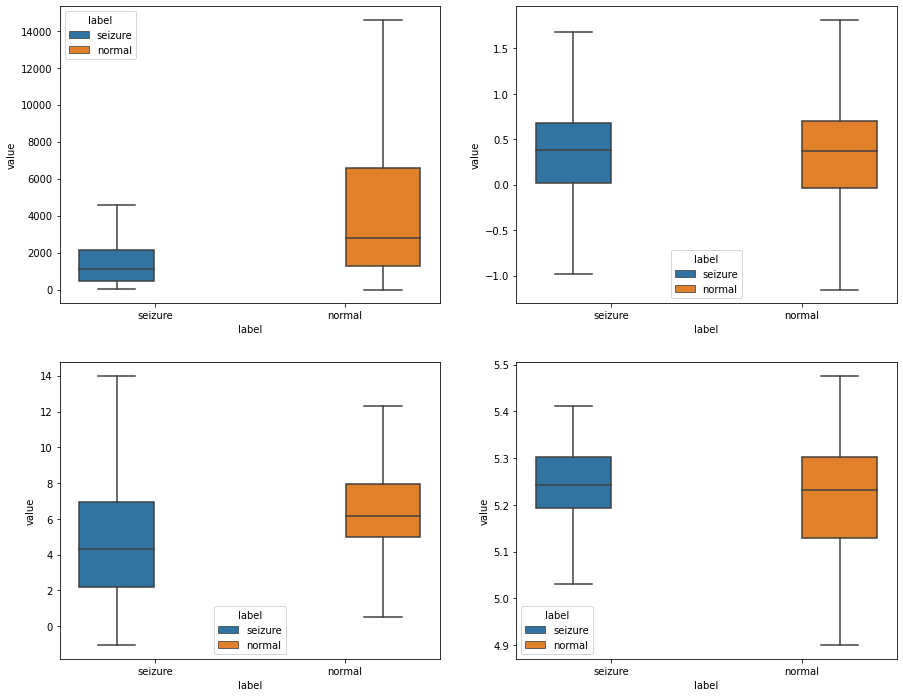

In [152]:
import matplotlib.pyplot as plt 
import seaborn as sns


def organizer_data(array1,array2):
    a = pd.DataFrame(data=[array1,np.repeat('seizure',len(array1))],index=['value','label']).T
    b = pd.DataFrame(data=[array2,np.repeat('normal',len(array2))],index=['value','label']).T
    return pd.concat([a,b])

plt.figure(figsize=(10,7))
f, axs = plt.subplots(2,2,figsize=(15,12))


sns.boxplot(x='label',y='value',hue='label',data=organizer_data(seizure_var,normal_var),showfliers=False,ax=axs[0,0])
sns.boxplot(x='label',y='value',hue='label',data=organizer_data(seizure_ske,normal_ske),showfliers=False,ax=axs[0,1])
sns.boxplot(x='label',y='value',hue='label',data=organizer_data(seizure_kur,normal_kur),showfliers=False,ax=axs[1,0])
sns.boxplot(x='label',y='value',hue='label',data=organizer_data(seizure_ent,normal_ent),showfliers=False,ax=axs[1,1])